In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [2]:
# Load dataset
df = pd.read_csv("crime_data.csv")

print(df.head())
print(df.dtypes)


       Region  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
Region       object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object


In [6]:
# Save state names separately
state_names = df.iloc[:, 0]

# Select only numeric columns
df_numeric = df.iloc[:, 1:]

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

In [10]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

C:\Users\Ekta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ekta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ekta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ekta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

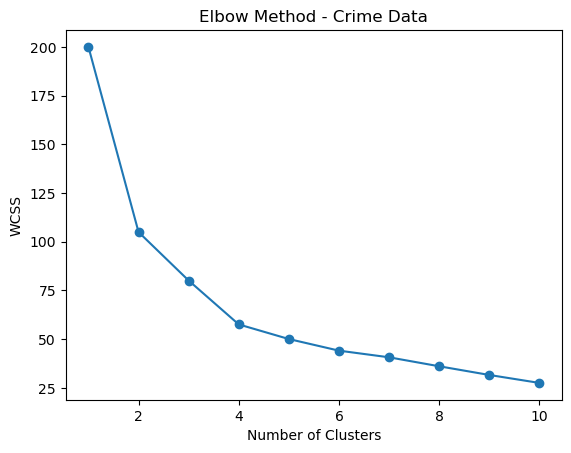

In [11]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        random_state=42,
        n_init=10   # explicitly set
    )
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method - Crime Data")
plt.show()


In [12]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

print(df.groupby('KMeans_Cluster').mean(numeric_only=True))

                   Murder     Assault   UrbanPop       Rape
KMeans_Cluster                                             
0                5.656250  138.875000  73.875000  18.781250
1               13.937500  243.625000  53.750000  21.412500
2                3.600000   78.538462  52.076923  12.176923
3               10.815385  257.384615  76.000000  33.192308


C:\Users\Ekta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


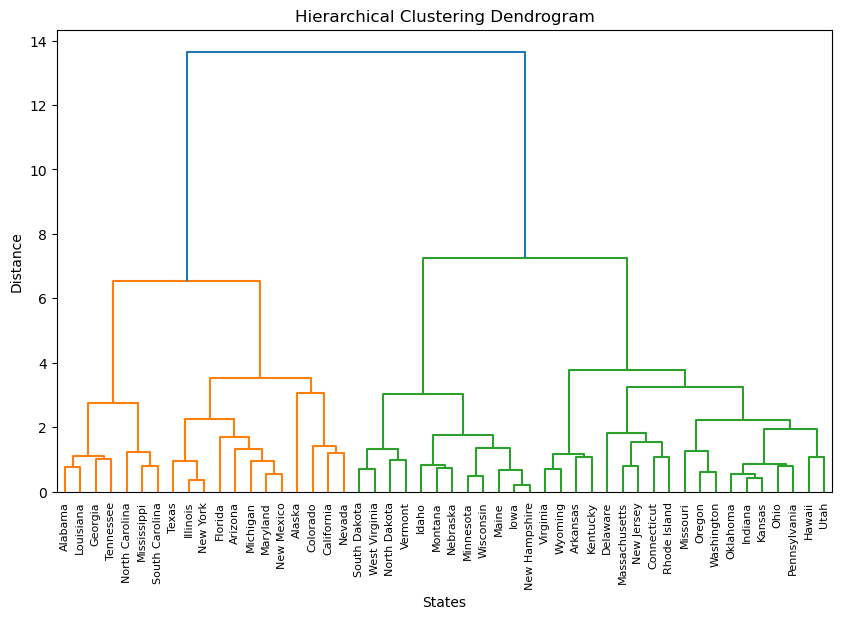

In [13]:
# Hierarchical Clustering
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=state_names.values)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("States")
plt.ylabel("Distance")
plt.show()

df['Hierarchical_Cluster'] = fcluster(linked, 4, criterion='maxclust')